# COVID Data Preparation

## Imports and File Paths

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
FILE_PATH_OWID_COVID_CSV = "./raw/covid-19-data/public/data/owid-covid-data.csv"
FILE_PATH_WHO_DOCTORS = "./raw/who-datasets/Medical doctors (per 10,000).csv"
FILE_PATH_GHS_INDEX = "./raw/ghs-index/Global Health Security Index (Overall Score).csv"
FILE_PATH_WORLDBANK_HEALTH_EXPENDITURE = "./raw/worldbank-datasets/Current health expenditure (% of GDP).csv"
FILE_PATH_WORLDBANK_GDP = "./raw/worldbank-datasets/GDP.csv"
FILE_PATH_WORLDBANK_DEVELOPMENT = "./raw/worldbank-datasets/Development.csv"
FILE_PATH_WORLDBANK_POVERTY = "./raw/worldbank-datasets/Poverty.csv"
FILE_PATH_WORLDBANK_POVERTY2 = "./raw/worldbank-datasets/Poverty2.csv"
FILE_PATH_KAGGLE_MALNUTRITION = "./raw/kaggle-datasets/malnutrition.csv"
FILE_PATH_KAGGLE_LOCKDOWN = "./raw/kaggle-datasets/countryLockdowndates.csv"
FILE_PATH_WORLDBANK_MORTALITY = "./raw/worldbank-datasets/Mortality.csv"
FILE_PATH_WORLDBANK_TRAVEL_TOURISM = "./raw/worldbank-datasets/TravelAndTourism.csv"

## COVID Numbers per Country

In [3]:
df = pd.read_csv(FILE_PATH_OWID_COVID_CSV)
df = df[(df.iso_code != 'OWID_WRL') & (df.total_cases.notnull())].sort_values('date', ascending=False).groupby('iso_code').first().reset_index()
df = df.loc[:, ['iso_code','continent','location','date','total_cases','total_deaths','total_cases_per_million','aged_70_older','gdp_per_capita','extreme_poverty','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities']]

In [4]:
print(df.head())

  iso_code      continent     location        date  total_cases  total_deaths  \
0      ABW  North America        Aruba  2020-06-23        101.0           3.0   
1      AFG           Asia  Afghanistan  2020-06-23      29143.0         598.0   
2      AGO         Africa       Angola  2020-06-23        183.0           9.0   
3      AIA  North America     Anguilla  2020-06-23          3.0           0.0   
4      ALB         Europe      Albania  2020-06-23       1995.0          44.0   

   total_cases_per_million  aged_70_older  gdp_per_capita  extreme_poverty  \
0                  945.994          7.452       35973.781              NaN   
1                  748.632          1.337        1803.987              NaN   
2                    5.568          1.362        5819.495              NaN   
3                  199.973            NaN             NaN              NaN   
4                  693.238          8.643       11803.431              1.1   

   cvd_death_rate  diabetes_prevalence  fema

(209, 15)


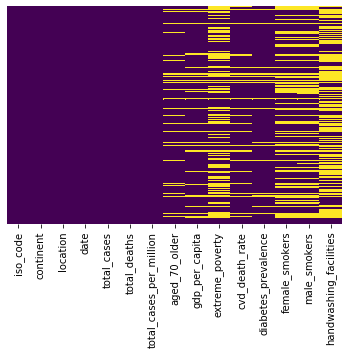

In [5]:
print(df.shape)
sns.heatmap(data = df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## WHO Medical Doctors per Country

In [6]:
df_doctors = pd.read_csv(FILE_PATH_WHO_DOCTORS)
df_doctors.rename(columns={'Location':'location','Period':'year','First Tooltip':'medical_doctors'}, inplace=True)
df_doctors = df_doctors.loc[:, ['location','medical_doctors']]

def rename_countries_doctors(country):
    mapping = { 'Bolivia (Plurinational State of)':'Bolivia', 'Brunei Darussalam':'Brunei',
               'Cabo Verde':'Cape Verde', 'Eswatini':'Swaziland',
               'Côte d’Ivoire':'Cote d\'Ivoire', 'Czechia':'Czech Republic',
               'Democratic Republic of the Congo':'Democratic Republic of Congo',
               'Iran (Islamic Republic of)':'Iran',
               'Lao People\'s Democratic Republic':'Laos',
               'The former Yugoslav Republic of Macedonia':'Macedonia',
               'Republic of Moldova':'Moldova', 'Russian Federation':'Russia',
               'Republic of Korea':'South Korea', 'Syrian Arab Republic':'Syria',
               'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
               'United States of America':'United States',
               'United Republic of Tanzania':'Tanzania', 'Viet Nam':'Vietnam',
               'Venezuela (Bolivarian Republic of)':'Venezuela',
              }
    if (country in mapping):
        return mapping[country]
    return country

df_doctors['location'] = df_doctors['location'].apply(lambda x: rename_countries_doctors(x))

df = df.merge(df_doctors, how = 'left', on = ['location'])

## Global Health Security Index per Country

(209, 17)


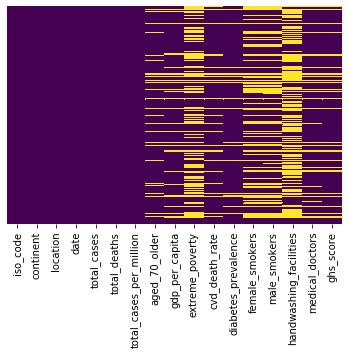

In [7]:
df_ghs = pd.read_csv(FILE_PATH_GHS_INDEX)

df_ghs.rename(columns={'country':'location', 'ghs_score':'ghs_score'}, inplace=True)
df_ghs = df_ghs.loc[:, ['location','ghs_score']]

df = df.merge(df_ghs, how = 'left', on = ['location'])

print(df.shape)
sns.heatmap(data = df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Current Health Expenditure per Country

(209, 18)


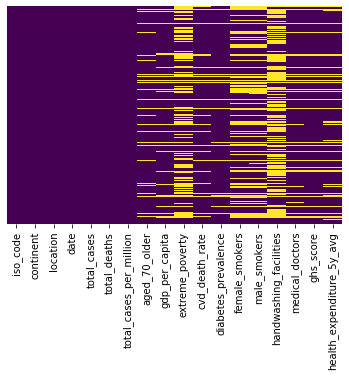

In [8]:
df_health_expenditure = pd.read_csv(FILE_PATH_WORLDBANK_HEALTH_EXPENDITURE)

years = [2017, 2016, 2015, 2014, 2013]

countries = []
health_expenditure_5y_avg = []
for index, row in df_health_expenditure.iterrows():
    values = []
    for year in years:
        value = row[str(year)]
        if (math.isnan(value)):
            break
        values.append(value)
    if (len(values) == len(years)):
        countries.append(row["Country Code"])
        health_expenditure_5y_avg.append(sum(values)/len(values))

df_health_exprenditure_5y_avg = pd.DataFrame({
    'iso_code': countries,
    'health_expenditure_5y_avg': health_expenditure_5y_avg,
})

df = df.merge(df_health_exprenditure_5y_avg, how = 'left', on = ['iso_code'])

print(df.shape)
sns.heatmap(data = df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## World Bank - World Development Indicators

(209, 27)


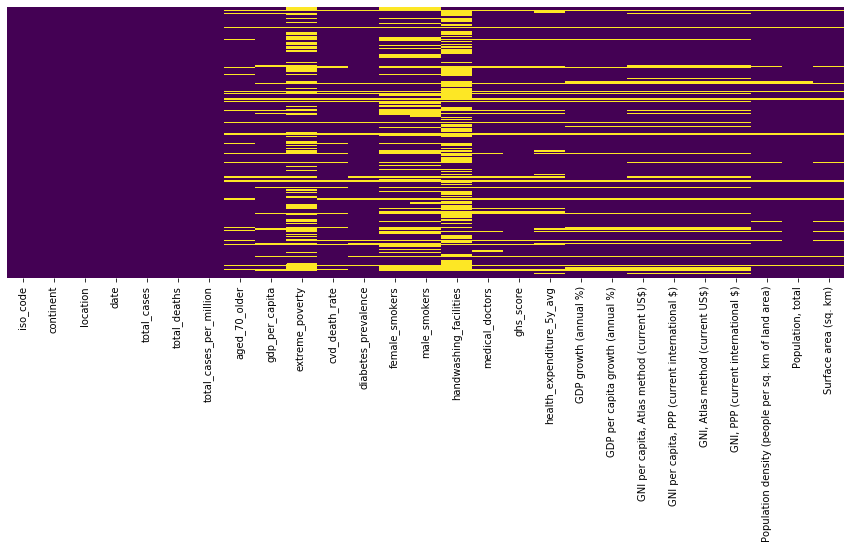

In [9]:
df_wb_gdp = pd.read_csv(FILE_PATH_WORLDBANK_GDP)

df_wb_gdp.rename(columns={'Country Name':'location', 'Country Code': 'iso_code'}, inplace=True)
df_wb_gdp = df_wb_gdp.pivot_table(index=['iso_code'], columns='Series Name', values='2018 [YR2018]').reset_index()

df = df.merge(df_wb_gdp, how = 'left', on = ['iso_code'])

print(df.shape)
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(data = df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)

## World Bank - Development

(209, 35)


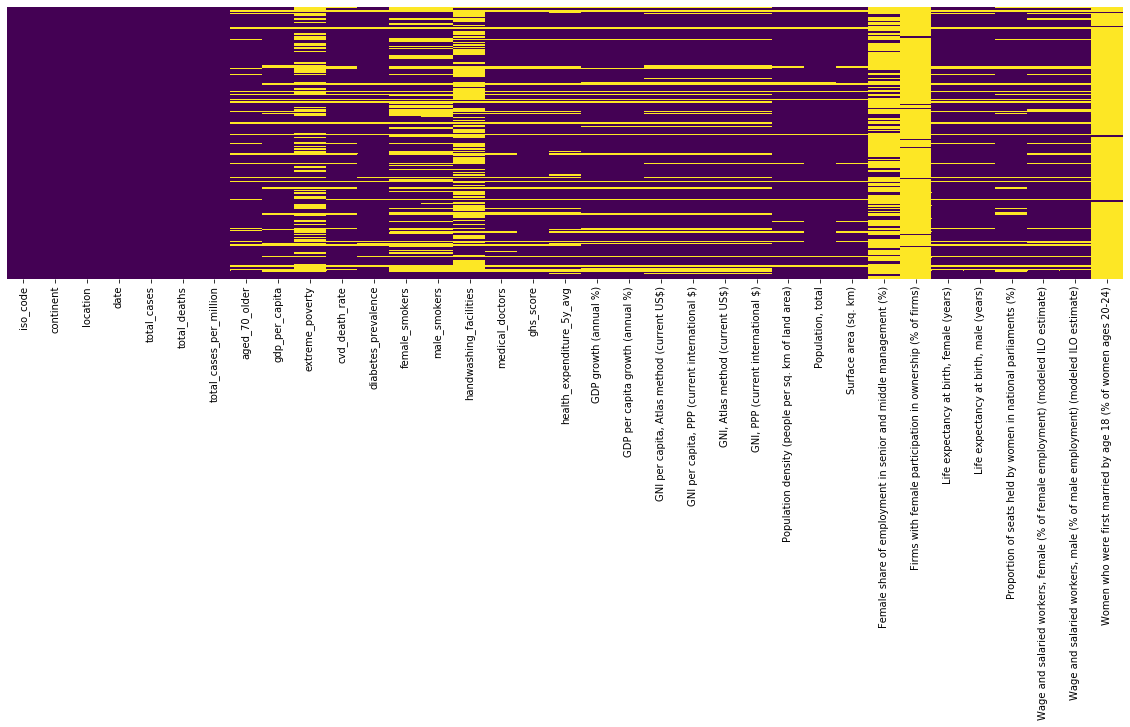

In [10]:
df_wb_dev = pd.read_csv(FILE_PATH_WORLDBANK_DEVELOPMENT)

df_wb_dev.rename(columns={'Country Name':'location', 'Country Code': 'iso_code'}, inplace=True)
df_wb_dev = df_wb_dev.pivot_table(index=['iso_code'], columns='Series Name', values='2018 [YR2018]').reset_index()

df = df.merge(df_wb_dev, how = 'left', on = ['iso_code'])

print(df.shape)
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)

## Malnutrition per Country

In [11]:
df_malnutrition_set = pd.read_csv(FILE_PATH_KAGGLE_MALNUTRITION)
df_malnutrition = df_malnutrition_set.loc[:, ['Country', 'Overweight', 'Stunting', 'Underweight']]
df_malnutrition['Country'] = df_malnutrition['Country'].apply(lambda x:x.title())
df_malnutrition.rename(columns={'Country':'location', 'Overweight':'overweight_in_percent', 'Stunting':'stunting_in_percent', 'Underweight':'underweight_in_percent'}, inplace=True)
print(df_malnutrition.shape)
df = df.merge(df_malnutrition, how = 'left', on = ['location'])

(152, 4)


(209, 38)


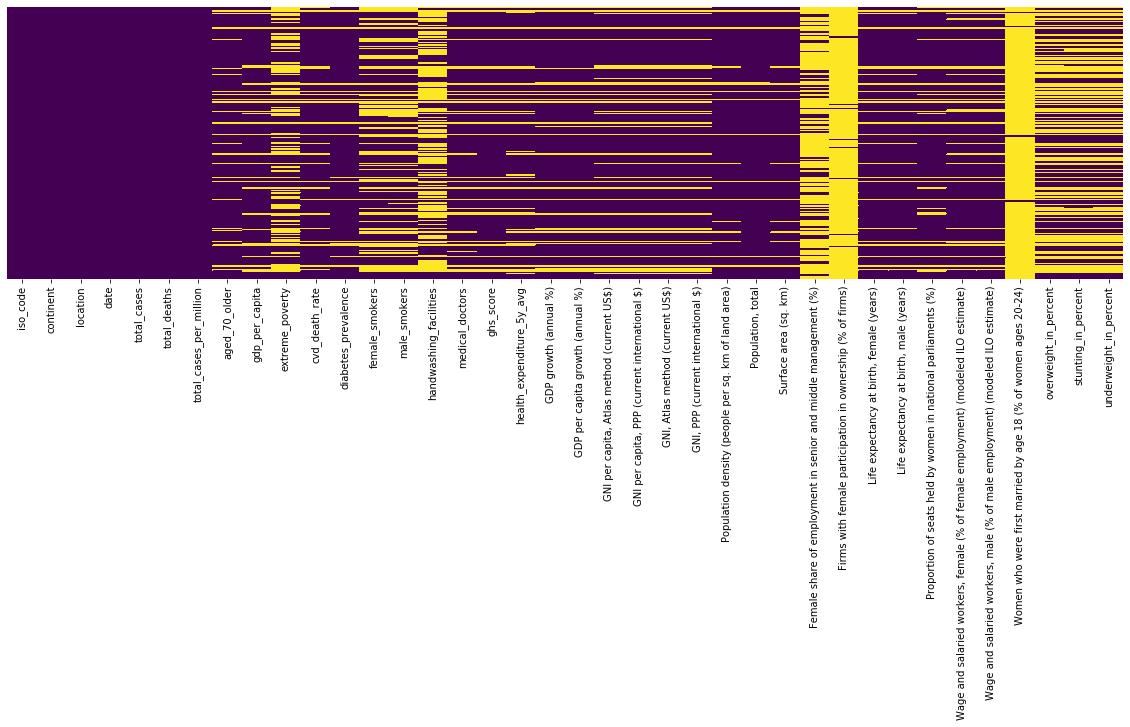

In [12]:
print(df.shape)
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)

# World Bank - Mortality

In [13]:
df_mortality_set = pd.read_csv(FILE_PATH_WORLDBANK_MORTALITY)
df_mortality_set.rename(columns={'Country Name':'location', 'Country Code': 'iso_code'}, inplace=True)
df_mortality = df_mortality_set.pivot_table(index=['iso_code'], columns='Series Name', values='2018 [YR2018]').reset_index()
df_mortality = df_mortality.loc[:, ['iso_code', 'Mortality rate, adult, female (per 1,000 female adults)', 'Mortality rate, adult, male (per 1,000 male adults)']]
print(df_mortality.shape)

(254, 3)


(209, 40)


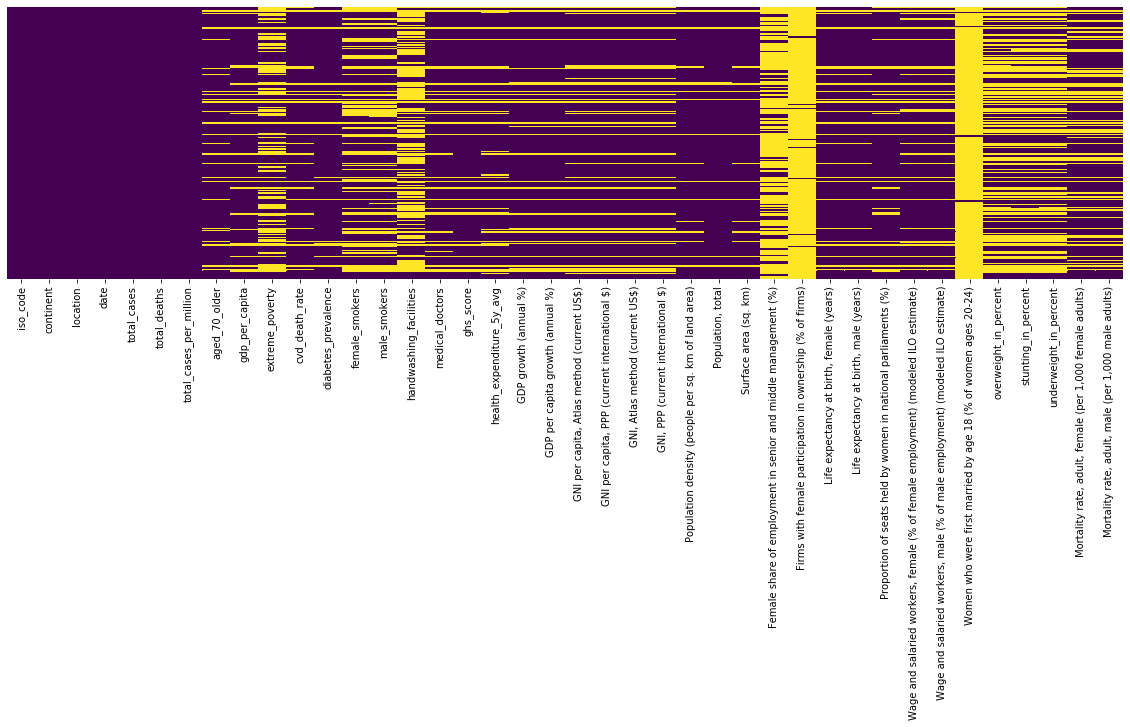

In [14]:
df = df.merge(df_mortality, how = 'left', on = ['iso_code'])
print(df.shape)
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)

# World Bank - Travel and Tourism

In [15]:
df_travel_tourism_set = pd.read_csv(FILE_PATH_WORLDBANK_TRAVEL_TOURISM)
df_travel_tourism_set.rename(columns={'Country Name':'location', 'Country Code': 'iso_code'}, inplace=True)
df_travel_tourism = df_travel_tourism_set.pivot_table(index=['iso_code'], columns='Series Name', values='2018 [YR2018]').reset_index()
print(df_travel_tourism.shape)

(242, 7)


(209, 46)


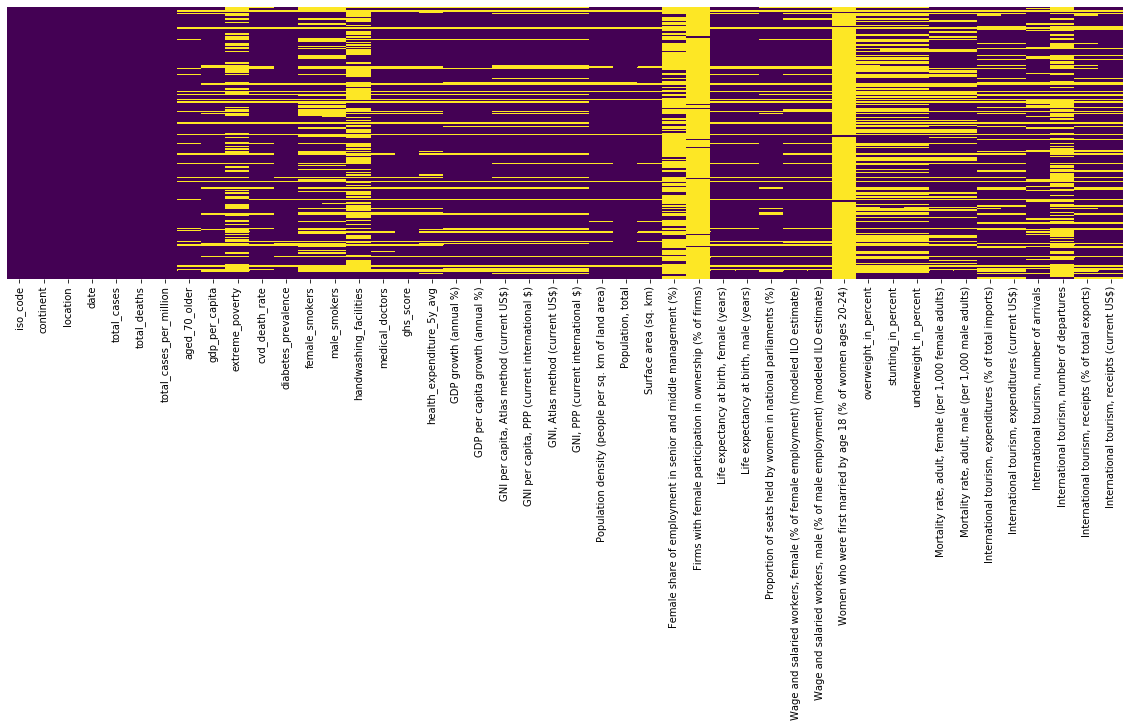

In [16]:
df = df.merge(df_travel_tourism, how = 'left', on = ['iso_code'])

print(df.shape)
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)

## Lockdown_type and _date per Country

In [17]:
df_lockdown_set = pd.read_csv(FILE_PATH_KAGGLE_LOCKDOWN)
# Generalize provinces of the countries and use earliest lockdown date
df_lockdown_set = df_lockdown_set.sort_values('Date', ascending=True).groupby('Country/Region').first().reset_index()

df_lockdown = df_lockdown_set.loc[:, ['Country/Region', 'Date', 'Type']]
df_lockdown.rename(columns={'Country/Region':'location', 'Date':'lockdown_date', 'Type':'lockdown_type'}, inplace=True)

(209, 48)


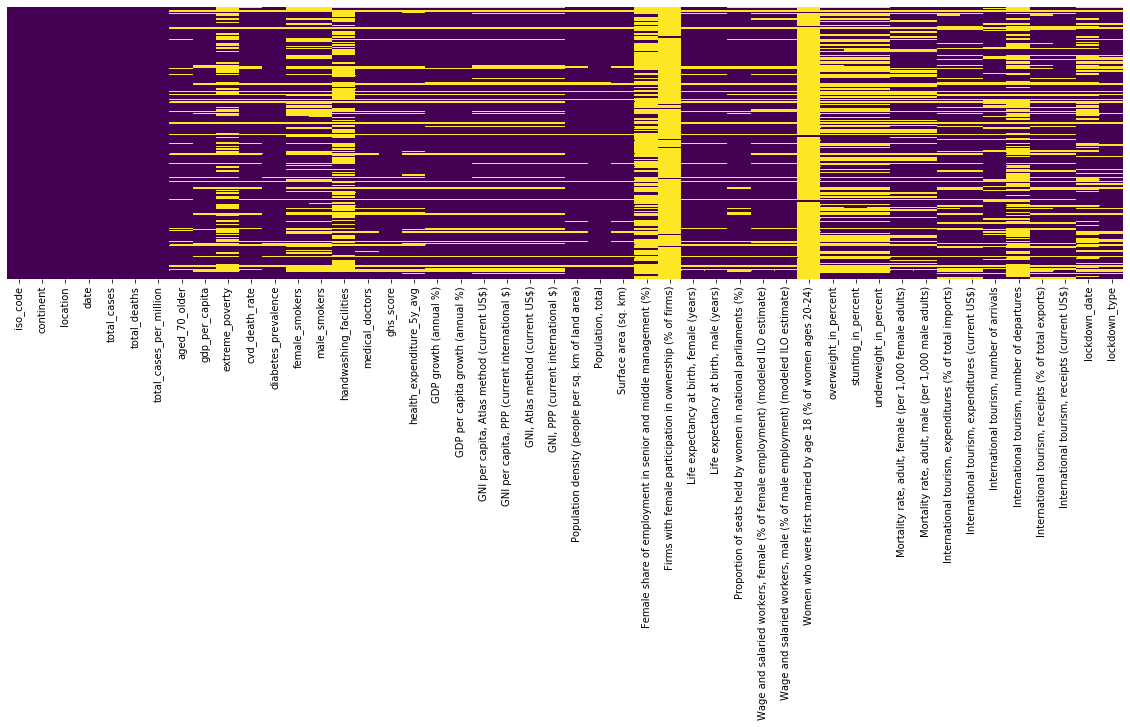

In [18]:
df = df.merge(df_lockdown, how = 'left', on = ['location'])
print(df.shape)
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)